# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [36]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io

url="https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"

response=requests.get(url)

print(response.status_code)
print(response.text)

200
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-cont

In [37]:
import pandas as pd

html = io.StringIO(response.text)
tables = pd.read_html(html)

print(f'N de tabla: {len(tables)}')

N de tabla: 27


In [38]:
df=tables[0]

df.drop(columns=["Ref."], axis=0,inplace=True)
df.head()




,Rank,Song,Artist(s),Streams (billions),Release date
0,1,"""Blinding Lights""",The Weeknd,4.897,29 November 2019
1,2,"""Shape of You""",Ed Sheeran,4.421,6 January 2017
2,3,"""Starboy""",The Weeknd and Daft Punk,3.956,21 September 2016
3,4,"""Someone You Loved""",Lewis Capaldi,3.947,8 November 2018
4,5,"""As It Was""",Harry Styles,3.936,1 April 2022


In [39]:

df.drop(df.tail(1).index,inplace=True)
df['Streams (billions)'] =df['Streams (billions)'].astype(float)
df['Release date'] = pd.to_datetime(df['Release date'],errors="coerce")
df['Rank']=df['Rank'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                100 non-null    int64         
 1   Song                100 non-null    object        
 2   Artist(s)           100 non-null    object        
 3   Streams (billions)  100 non-null    float64       
 4   Release date        100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ KB


In [40]:
conn = sqlite3.connect("spotify_canciones_mas_escuchadas.db")
df.to_sql("mas_reproducidas", conn , if_exists="replace",index=False)


DatabaseError: Execution failed on sql 'DROP TABLE "mas_reproducidas"': database is locked

In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM mas_reproducidas")
print(cursor.fetchone())
conn.commit()
conn.close

(1, '"Blinding Lights"', 'The Weeknd', 4.897, '2019-11-29 00:00:00')


<function Connection.close()>

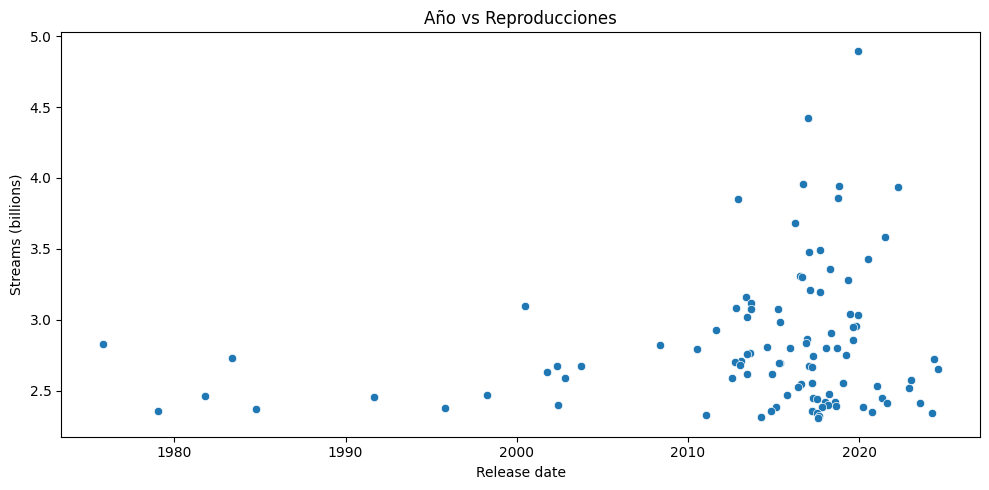

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(df,x="Release date",y="Streams (billions)")
plt.title("Año vs Reproducciones")
plt.tight_layout()
plt.show()

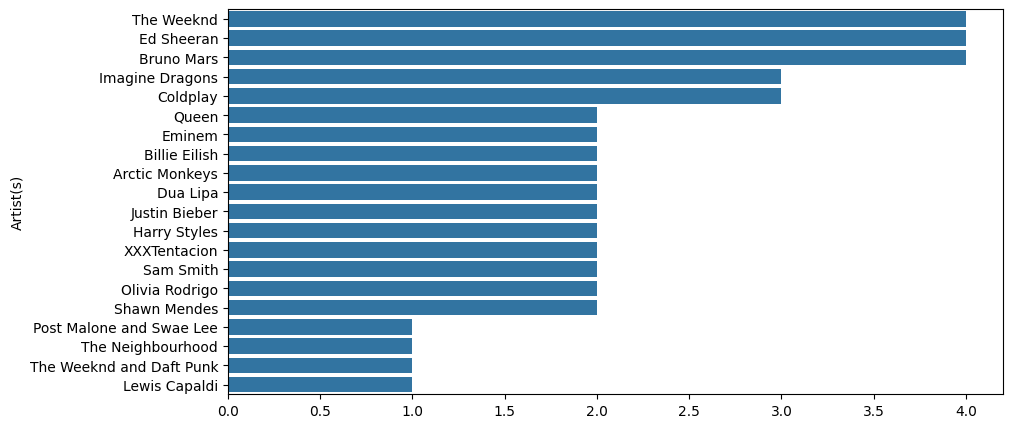

In [54]:
n_canciones_x_artista = df["Artist(s)"].value_counts().nlargest(20)
plt.figure(figsize=(10,5))
sns.barplot(x=n_canciones_x_artista.values, y=n_canciones_x_artista.index)

plt.show()

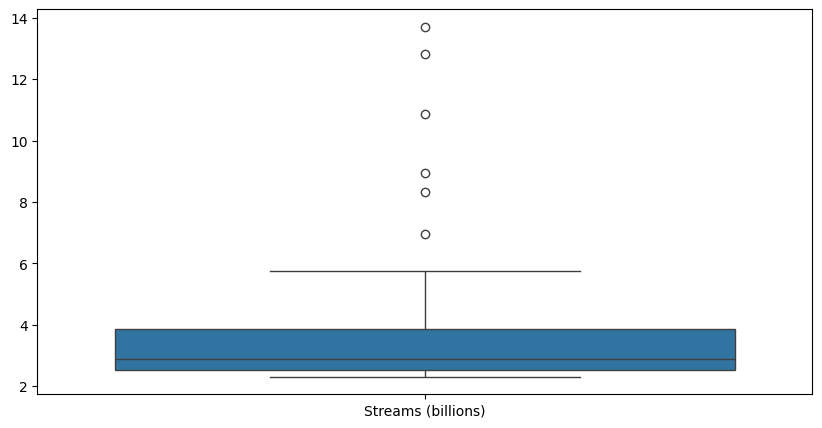

In [52]:
suma_reproducciones_x_artista = df[['Artist(s)','Streams (billions)']].groupby(['Artist(s)']).sum()
suma_reproducciones_x_artista.sort_values(['Streams (billions)'],ascending=False,inplace=True)

plt.figure(figsize=(10,5))
sns.boxplot(suma_reproducciones_x_artista)
plt.show()